# Artificial Neural Network using Keras, Sklearn, Scratch
# Name:- Suryansh Ambekar
# PRN no:- 202201090042
# Batch:- T3

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("shubhammeshram579/bank-customer-churn-prediction")

print("Path to dataset files:", path)

In [ ]:
import pandas as pd
df=pd.read_csv("/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv")
df.head()

# ANN with Keras

Epoch 1/40


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


154/154 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.7815 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 2/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8026 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 3/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8037 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 4/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8001 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 5/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7980 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 6/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8080 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 7/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7942 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 8/40
154/154 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8045 - loss: nan - val_accuracy: 0.7953 - val_loss: nan
Epoch 9/40
154/154 ━━━━━━━━━━━━━━━━

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


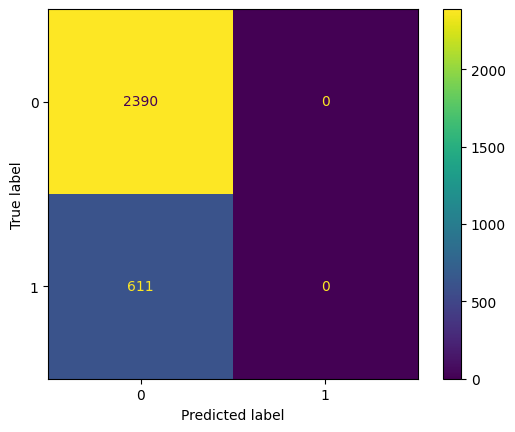

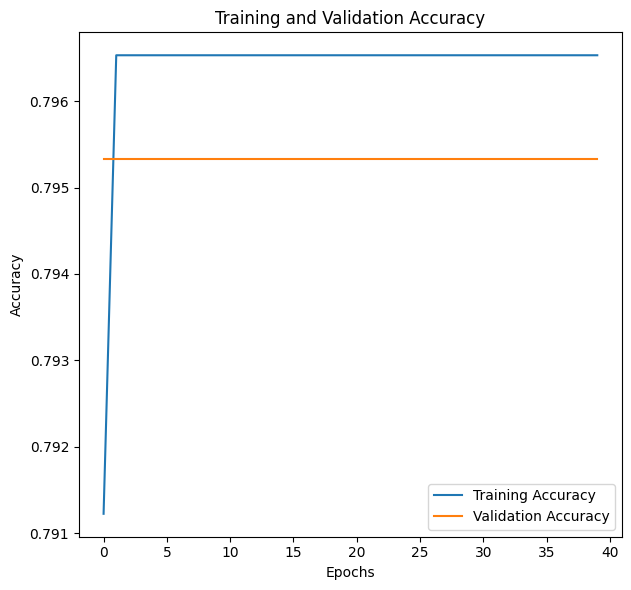

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.utils import to_categorical

# Load the Bank Churn dataset
file_path = "/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv"
df = pd.read_csv(file_path)

# Drop irrelevant columns
df = df.drop(columns=["RowNumber", "CustomerId", "Surname"])

# Convert categorical columns to numerical
df["Geography"] = df["Geography"].astype("category").cat.codes
df["Gender"] = df["Gender"].astype("category").cat.codes

# Define features and target variable
X = df.drop(columns=["Exited"]).values  # Features
y = df["Exited"].values  # Target (Churn: 1, No Churn: 0)

# Convert target variable into one-hot encoding
y = to_categorical(y)

# Split the dataset into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the ANN model
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 64 neurons
    Dense(32, activation='relu'),  # Hidden layer with 32 neurons
    Dense(2, activation='softmax')  # Output layer with 2 neurons (binary classification: churn or not)
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=40, batch_size=32, validation_split=0.3, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predict class probabilities
y_pred_prob = model.predict(X_test)
y_pred = np.argmax(y_pred_prob, axis=1)
y_test_labels = np.argmax(y_test, axis=1)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test_labels, y_pred))

# Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test_labels, y_pred)
plt.show()

# Plot Training and Validation Loss/Accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout()
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function
def sigmoid_derivative(x):
    return x * (1 - x)
file_path = "/root/.cache/kagglehub/datasets/shubhammeshram579/bank-customer-churn-prediction/versions/1/Churn_Modelling.csv"
df = pd.read_csv(file_path)
# Drop irrelevant columns
df.drop(columns=["RowNumber", "CustomerId", "Surname"], inplace=True)

# Extract features and target
X = df.drop(columns=["Exited"]).copy()  # Features (All except target)
y = df["Exited"].values.reshape(-1, 1)  # Target (Churn: 1, No Churn: 0)

# One-Hot Encode Categorical Features
categorical_features = ["Geography", "Gender"]
encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical_features])

# Remove original categorical columns and add one-hot encoded features
X = np.hstack((df.drop(columns=categorical_features).values, encoded_cats))

# Normalize Feature Values
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split Dataset into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Neural Network Class Definition
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(self.input_size, self.hidden_size)
        self.bias_hidden = np.random.randn(1, self.hidden_size)

        self.weights_hidden_output = np.random.randn(self.hidden_size, self.output_size)
        self.bias_output = np.random.randn(1, self.output_size)

    def forward(self, X):
        self.input_layer = X

        # Hidden layer activation
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        # Output layer activation (Sigmoid for binary classification)
        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        # Compute error in the output layer
        error_output = self.output_layer_output - y

        # Compute gradient for output layer
        output_layer_delta = error_output * sigmoid_derivative(self.output_layer_output)

        # Compute error in the hidden layer
        error_hidden = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output -= self.hidden_layer_output.T.dot(output_layer_delta) * learning_rate
        self.bias_output -= np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden -= X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden -= np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

            # Compute loss (Binary Cross-Entropy)
            loss = -np.mean(y * np.log(self.output_layer_output + 1e-9) + (1 - y) * np.log(1 - self.output_layer_output + 1e-9))

            if epoch % 500 == 0:
                print(f"Epoch {epoch} - Loss: {loss:.4f}")

    def predict(self, X):
        output = self.forward(X)
        return (output > 0.5).astype(int)  # Convert probabilities to binary class labels

# Initialize and Train the Neural Network
nn = NeuralNetwork(input_size=X_train.shape[1], hidden_size=10, output_size=1)  # 10 hidden neurons
nn.train(X_train, y_train, epochs=5000, learning_rate=0.01)

# Predictions on Test Data
y_pred = nn.predict(X_test)

# Calculate Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy * 100:.2f}%")

# Print Predictions
print("\nPredicted labels:", y_pred.flatten())
print("Actual labels:   ", y_test.flatten())


Epoch 0 - Loss: nan
Epoch 500 - Loss: nan
Epoch 1000 - Loss: nan
Epoch 1500 - Loss: nan
Epoch 2000 - Loss: nan
Epoch 2500 - Loss: nan
Epoch 3000 - Loss: nan
Epoch 3500 - Loss: nan
Epoch 4000 - Loss: nan
Epoch 4500 - Loss: nan

Test Accuracy: 79.91%

Predicted labels: [0 0 0 ... 0 0 0]
Actual labels:    [0 0 0 ... 1 0 0]
